In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 读入数据
iris = datasets.load_iris()
X = iris.data 
y = iris.target
Data =np.c_[X[50:,:],np.ones([100,1])]

label = y[50:]-1  #第二类和第三类原始的label是2，3
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [3]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    Data, label, test_size=0.33, random_state=42)

In [4]:
# sigmoid function
def my_sigmoid(w,x):
    return  1/(1+np.exp(-w.T.dot(x.T)))
# 损失函数
def obj_fun(w,x,y):
    tmp = y.reshape(1,-1)*np.log(my_sigmoid(w,x)) + \
    (1-y.reshape(1,-1))*np.log(1-my_sigmoid(w,x))
    return np.sum(-tmp)
# 计算随机梯度的函数
def my_Stgrad(w,x,y):
    return (my_sigmoid(w,x) - y)*x.T


**-------------------------**
The weights are:

[[-2.11103068]
 [-2.07932512]
 [ 3.09646273]
 [ 2.96635593]
 [-0.82388082]]
**-------------------------**


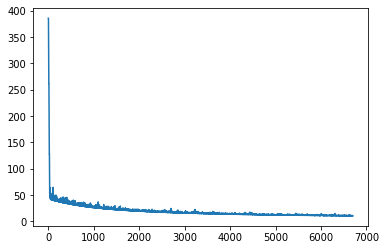

In [5]:
# 随机梯度下降求解逻辑斯蒂回归

#初始化 
w = np.random.random([5,1])
alpha = 0.01 # learning rate
obj = obj_fun(w,X_train,y_train)
row,_ = X_train.shape
loss = []
for iter in range(100):  # epoch = 100
    idx = np.random.permutation(row) # 每个epoch随机打乱数据
    for num in range(row):
        tmp_x = X_train[idx[num],:].reshape(1,-1)
        tmp_y = y_train[idx[num]]
        # 用负梯度方向更新w
        w = w - alpha*my_Stgrad(w,tmp_x,tmp_y)
        # 记录每次调整后的损失，实际是不需要的
        loss.append(obj_fun(w,X_train,y_train))
    new_obj = obj_fun(w,X_train,y_train)
    if np.abs(new_obj - obj)< 0.001:
        print('The number of iteration: %d epochs'%iter)
        break
    else:
        obj = new_obj
print('**-------------------------**')
print('The weights are:\n')
print(w)
print('**-------------------------**')
plt.plot(loss) 

In [6]:
# 对测试数据进行预测
pred = my_sigmoid(w,X_test)>0.5
Acc = 1 - np.sum((1*pred) !=y_test)/y_test.size
print('The prediction accuracy for Class 2 and Class 3 is: %.2f%%' %(Acc*100))

The prediction accuracy for Class 2 and Class 3 is: 93.94%
